## 1. Project Topic
Breast cancer is one of the most fatal cancers among women, primarily caused by the abnormal proliferation of cells in breast tissue, leading to tumor formation that may spread to other parts of the body. Early detection and accurate prediction of breast cancer are crucial for improving treatment success rates. This study aims to explore and construct a high-precision breast cancer tumor prediction framework using various supervised learning methods (Logistic Regression, SVM, Decision Tree, Random Forest) in machine learning. Such a predictive system can assist healthcare professionals in identifying high-risk patients at an earlier stage, allowing them to devise more targeted treatment strategies and ultimately improve patient survival rates and quality of life.



## 2. Data Introduction
The data source for this study is the Breast Cancer Wisconsin (Diagnostic) dataset, obtained from the UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic. This dataset contains 569 records and 32 attributes. Attribute information includes ID number, diagnosis (M = malignant, B = benign), and 30 real-valued numerical variables calculated from ten features derived for each cell nucleus.

The ten features of the cell nucleus consist of: a) radius (mean of distances from center to points on the perimeter), b) texture (standard deviation of gray-scale values), c) perimeter d) area, e) smoothness (local variation in radius lengths), f) compactness (perimeter^2 / area - 1.0), g) concavity (severity of concave portions of the contour), h) concave points (number of concave portions of the contour), i) symmetry, j) fractal dimension ("coastline approximation" - 1)

Additional Variable Information: 1) ID number, 2) Diagnosis (M = malignant, B = benign), ......


## 3. Data Cleaning and Exploratory Data Analysis

In [1]:
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt

### 3.1 Read Dataset

In [2]:
data = pd.read_csv('breast_cancer_30.csv')

### 3.2 Data Cleaning 
We will remove irrelevant features and data with NaN values.

In [5]:
# View all colum name in the dataset
columns = data.columns 
print(columns)

# Extract the target label 
y = data['diagnosis'] 

columns_to_remove = ['Unnamed: 32', 'id', 'diagnosis']

# Drop the specified columns from the data
X = data.drop(columns=columns_to_remove)

# View
X.head()


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 3.3 Exploratory Data Analysis

In [6]:
# Check for missing values
print(data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Get basic statistical summary of the dataset
print(data.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

diagnosis
B    357
M    212
Name: count, dtype: int64


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

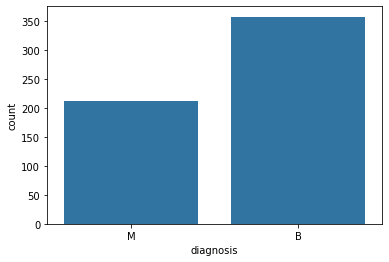

In [8]:
#Check the distribution of the diagnosis (target variable)
print(y.value_counts())

# Plot the distribution of target labels
sns.countplot(x='diagnosis', data=data)


<AxesSubplot:xlabel='radius_mean', ylabel='Count'>

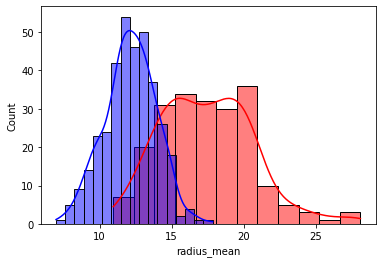

In [12]:
# Plot histograms of features for each diagnosis categoryies
sns.histplot(data[data['diagnosis'] == 'M']['radius_mean'], color='red', kde=True, label='Malignant')
sns.histplot(data[data['diagnosis'] == 'B']['radius_mean'], color='blue', kde=True, label='Benign')

In [14]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Data normalization

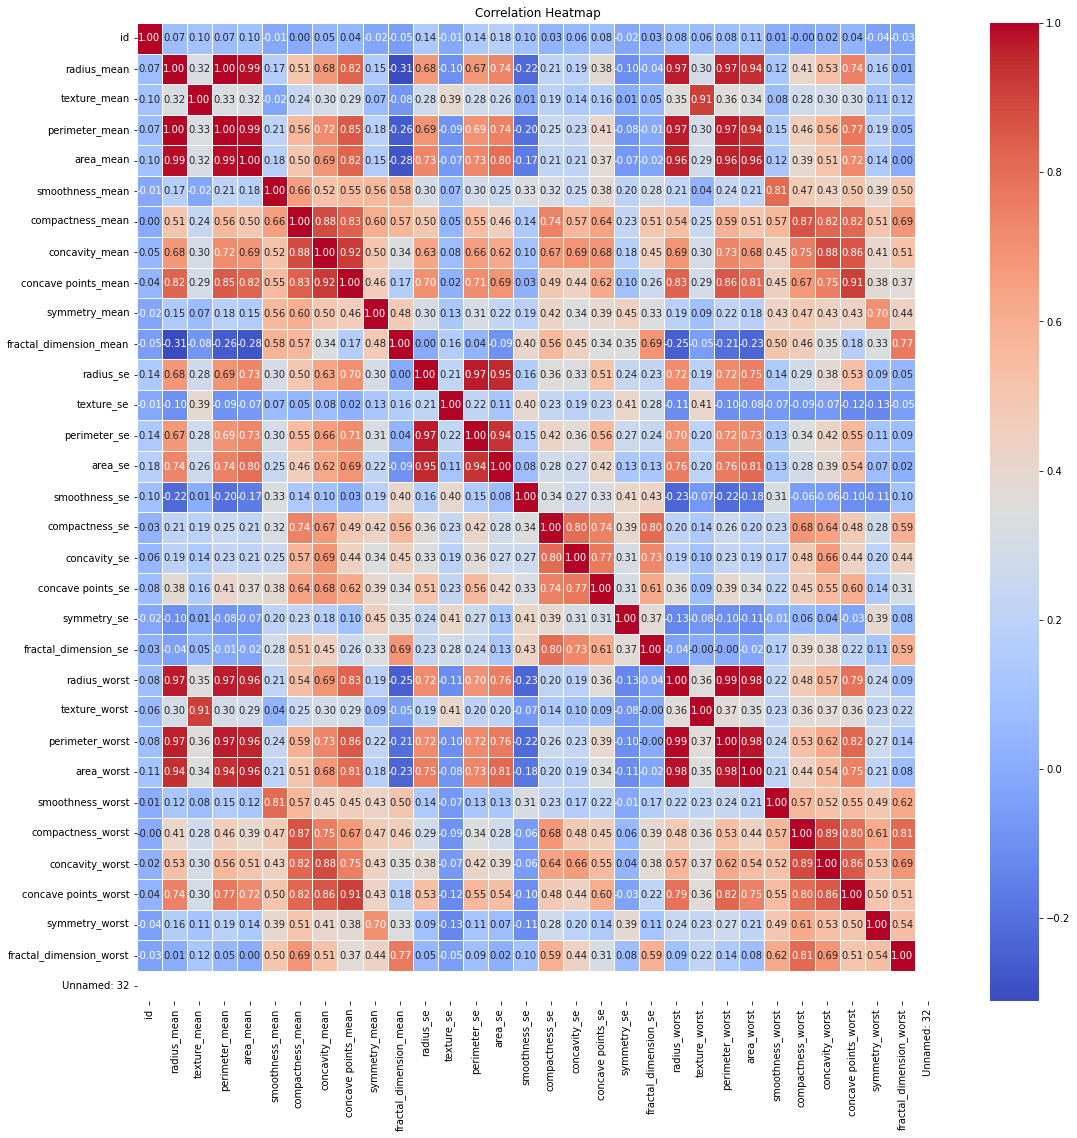

In [17]:
# Drop non-numeric column
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize
data_standardized = (numeric_data - numeric_data.mean()) / numeric_data.std()

# Compute the correlation matrix of feature
correlation_matrix = data_standardized.corr()

# Plot the correlation heatmap
plt.figure(figsize=(18, 18)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### 3.4 Feature Selection

In [21]:
# Use drop method to remove highly correlated features
corr_mat = X.corr()
for target in X:
    # Get the list of high correlated features
    candidates = corr_mat.index[(corr_mat[target] >= 0.8) | (corr_mat[target] <= -0.8)].values
    candidates = candidates[candidates != target]
    print(f'Correlated to {target}: ')
    print(candidates)

    # Remove features with correlation >= 0.8 or <= -0.8
    for c1 in candidates:
        for c2 in candidates:
            if c1 != c2:
                coef = corr_mat.loc[c1, c2]
                if abs(coef) >= 0.8:
                    # Drop feature c1
                    X_drop = X.drop(columns=[c1])
                    print(f'Removed: {c1}')

    print(f'Selected features: {X_drop.columns}')
    print(" ")

Correlated to radius_mean: 
['perimeter_mean' 'area_mean' 'concave points_mean' 'radius_worst'
 'perimeter_worst' 'area_worst']
Removed: perimeter_mean
Removed: perimeter_mean
Removed: perimeter_mean
Removed: perimeter_mean
Removed: perimeter_mean
Removed: area_mean
Removed: area_mean
Removed: area_mean
Removed: area_mean
Removed: area_mean
Removed: concave points_mean
Removed: concave points_mean
Removed: concave points_mean
Removed: concave points_mean
Removed: concave points_mean
Removed: radius_worst
Removed: radius_worst
Removed: radius_worst
Removed: radius_worst
Removed: radius_worst
Removed: perimeter_worst
Removed: perimeter_worst
Removed: perimeter_worst
Removed: perimeter_worst
Removed: perimeter_worst
Removed: area_worst
Removed: area_worst
Removed: area_worst
Removed: area_worst
Removed: area_worst
Selected features: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_me

#### Drop Features
Under normal circumstances, we set 0.8 as the threshold for the Pearson correlation matrix.

In [22]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = X_drop.drop(drop_list1,axis = 1 )     
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678


In [13]:
x_1.to_csv("NewFeatures_16_1.csv")

## 4. Many Models

### 4.1 Preparation for new data input and training

In [23]:
df= pd.read_csv("NewFeatures_16_1.csv")

The feature "diagnosis" is a binary categorical variable with values 'B' (Benign) and 'M' (Malignant). As the label for the supervised learning problem, its values will be defined as 0 and 1 for training.

In [26]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [27]:
X= df.drop("diagnosis",axis=1)
y= df["diagnosis"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

### 4.2 Model Building
It includes four supervised learning models Logistic Regression,Support Vector Machine,Decision Tree Classifier and Random Forest Classifier

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=1)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\n" + "="*50 + "\n")

# SVM
svm = SVC(random_state=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\n" + "="*50 + "\n")

# Decision Tree
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))
print("\n" + "="*50 + "\n")

# Random Forest
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Logistic Regression Results:
Accuracy: 0.9122807017543859
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        72
           1       0.92      0.83      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114

Confusion Matrix:
 [[69  3]
 [ 7 35]]


Support Vector Machine Results:
Accuracy: 0.8859649122807017
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        72
           1       1.00      0.69      0.82        42

    accuracy                           0.89       114
   macro avg       0.92      0.85      0.87       114
weighted avg       0.90      0.89      0.88       114

Confusion Matrix:
 [[72  0]
 [13 29]]


Decision Tree Results:
Accuracy: 0.8859649122807017
Classification Report:
               precision

### 4.3 Hyperparameter fine-tuning

In [29]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for each model

# Logistic Regression Hyperparameter Grid
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization streng
    'solver': ['liblinear', 'saga'],  # solvers to use
    'max_iter': [1000, 2000, 3000]  # Maximum iterations
}

# SVM Hyperparameter Grid
svm_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization paramete
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Decision Tree Hyperparameter Grid
dtree_param_grid = {
    'max_depth': [3, 5, 10, None],  # Maximum depth of tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split nodes
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at leaf nodes
    'criterion': ['gini', 'entropy']  # The function to measure the quality of splits
}

# Random Forest Hyperparameter Grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [3, 5, 10, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split nodes
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at leaf nodes
    'criterion': ['gini', 'entropy']  # The function to measure the quality of splits
}

# Logistic Regression - Hyperparameter Tuning
logreg_grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=1), logreg_param_grid, cv=5, n_jobs=-1, verbose=1)
logreg_grid_search.fit(X_train, y_train)
print("Best Logistic Regression Hyperparameters:", logreg_grid_search.best_params_)
best_logreg_model = logreg_grid_search.best_estimator_
y_pred_logreg_best = best_logreg_model.predict(X_test)
print("Logistic Regression Best Model Accuracy:", accuracy_score(y_test, y_pred_logreg_best))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg_best))
print("\n" + "="*50 + "\n")

# SVM
svm_grid_search = GridSearchCV(SVC(random_state=1), svm_param_grid, cv=5, n_jobs=-1, verbose=1)
svm_grid_search.fit(X_train, y_train)
print("Best SVM Hyperparameters:", svm_grid_search.best_params_)
best_svm_model = svm_grid_search.best_estimator_
y_pred_svm_best = best_svm_model.predict(X_test)
print("SVM Best Model Accuracy:", accuracy_score(y_test, y_pred_svm_best))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_best))
print("\n" + "="*50 + "\n")

# Decision Tree
dtree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), dtree_param_grid, cv=5, n_jobs=-1, verbose=1)
dtree_grid_search.fit(X_train, y_train)
print("Best Decision Tree Hyperparameters:", dtree_grid_search.best_params_)
best_dtree_model = dtree_grid_search.best_estimator_
y_pred_dtree_best = best_dtree_model.predict(X_test)
print("Decision Tree Best Model Accuracy:", accuracy_score(y_test, y_pred_dtree_best))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree_best))
print("\n" + "="*50 + "\n")

# Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=1), rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)
print("Best Random Forest Hyperparameters:", rf_grid_search.best_params_)
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)
print("Random Forest Best Model Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))

# Compare the best models
models = {
    'Logistic Regression': best_logreg_model,
    'SVM': best_svm_model,
    'Decision Tree': best_dtree_model,
    'Random Forest': best_rf_model
}

best_model_name = max(models, key=lambda model: accuracy_score(y_test, models[model].predict(X_test)))
print(f"\nThe best model is: {best_model_name}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Logistic Regression Hyperparameters: {'C': 10, 'max_iter': 1000, 'solver': 'liblinear'}
Logistic Regression Best Model Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[71  1]
 [ 4 38]]


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best SVM Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
SVM Best Model Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                 

/root/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: T

## 5 Results and Analysis:
In this experiment, four machine learning models were evaluated: Logistic Regression, SVM, Decision Tree, and Random Forest. Both Logistic Regression and SVM achieved the highest accuracy of 95.6%, with similar performance. The precision and recall for "Benign" (0) were 0.95 and 0.99, respectively, while for "Malignant" (1), they were 0.97 and 0.90. The F1-scores were also high for both models, with 0.97 for "Benign" and 0.94 for "Malignant". The confusion matrix showed minimal misclassification.
The Decision Tree model had a slightly lower accuracy of 90.4%. Its precision for "Benign" was 0.92 and for "Malignant" was 0.88, with recall values of 0.93 and 0.86. The F1-scores were 0.92 for "Benign" and 0.87 for "Malignant", indicating slightly poorer performance compared to Logistic Regression and SVM. Random Forest performed similarly to Logistic Regression and SVM, with an accuracy of 94.7%. It had precision values of 0.93 for "Benign" and 0.97 for "Malignant", and recall values of 0.99 for "Benign" and 0.88 for "Malignant". The F1-scores were 0.96 for "Benign" and 0.93 for "Malignant".

Overall, the Logistic Regression was the best-performing model, followed closely by SVM. Both performed well, but Logistic Regression was the preferred choice based on the evaluation metrics.


| Model              | Type              | Accuracy | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) | Confusion Matrix   |
|--------------------|-------------------|----------|---------------|---------------|------------|------------|--------------|--------------|---------------------|
| **Logistic Regression** | Supervised        | 0.956    | 0.95          | 0.97          | 0.99       | 0.90       | 0.97         | 0.94         | [[71, 1], [4, 38]] |
| **SVM**             | Supervised        | 0.956    | 0.95          | 0.97          | 0.99       | 0.90       | 0.97         | 0.94         | [[71, 1], [4, 38]] |
| **Decision Tree**   | Supervised        | 0.904    | 0.92          | 0.88          | 0.93       | 0.86       | 0.92         | 0.87         | [[67, 5], [6, 36]] |
| **Random Forest**   | Supervised        | 0.947    | 0.93          | 0.97          | 0.99       | 0.88       | 0.96         | 0.93         | [[71, 1], [5, 37]] |


## 6 Discussion and Conclusion

**Reflection on Learning and Key Insights:**

Through this experiment, I have gained a deeper understanding of the strengths and weaknesses of different machine learning algorithms, especially in classification tasks. I learned that Logistic Regression and SVM are highly effective for datasets like this, where the goal is to differentiate between two categories (benign vs. malignant). The importance of fine-tuning hyperparameters was also highlighted, as it significantly improved model performance. Additionally, I now realize that models like Decision Tree and Random Forest may not always outperform simpler models in certain cases, depending on the data and task.

**Challenges and Solutions:**

One of the main challenges faced during this experiment was the model selection process. I had to choose between multiple algorithms, each with different strengths. For example, while Random Forest is usually powerful, it did not perform as well on this dataset. I overcame this challenge by carefully tuning hyperparameters and using cross-validation to ensure the most accurate results. Another challenge was ensuring that the models were not overfitting, especially for Decision Tree, which tends to perform poorly on unseen data. By limiting tree depth and adjusting other hyperparameters, I was able to mitigate this issue.

**Suggestions for Model Improvement:**

For further improvement, I would suggest exploring ensemble methods more deeply. Random Forest showed promise but could be fine-tuned even further for better accuracy. Additionally, incorporating feature engineering and selection could enhance the models’ ability to focus on the most informative features, leading to better performance. Lastly, trying out more complex models, such as Gradient Boosting or Neural Networks, might yield even better results, especially for a larger or more complex dataset.


## 7. References:
[1] https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic<br/>
[2] https://github.com/AFAgarap/wisconsin-breast-cancer<br/>
[3] https://github.com/saswatsamal/Breast-Cancer-Machine-Learning-Prediction-System<br/>
[4] https://github.com/AFAgarap/support-vector-machine<br/>
[5] https://github.com/yhuangbl/anomaly_detection<br/>
[6] https://github.com/ShalakaPawar/Cancer-Dataset<br/>
Note: While completing assignments, I might encounter some errors, which could be caused by a Python library that I am not familiar with. In such cases, I try to ask ChatGPT about the specific purpose and structural composition of the Python library.